In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("28-urban_pedestrian_locations_with_labels.csv")

In [3]:
df.head()

,x_position,y_position,true_cluster
0,0.830586,-0.447733,1
1,0.701678,0.816918,0
2,1.022080,-0.492571,1
3,-0.316765,0.953438,0
4,0.293226,1.057185,0


In [4]:
df.shape

(500, 3)

<Axes: xlabel='x_position', ylabel='y_position'>

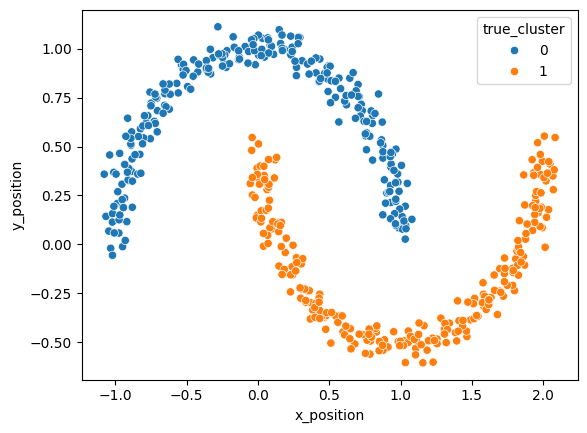

In [6]:
sns.scatterplot(df, x="x_position",y="y_position", hue="true_cluster")

In [10]:
from sklearn.cluster import KMeans
X = df.drop("true_cluster", axis=1)
y = df["true_cluster"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)
X_test["cluster_predict"] = y_pred

<Axes: xlabel='x_position', ylabel='y_position'>

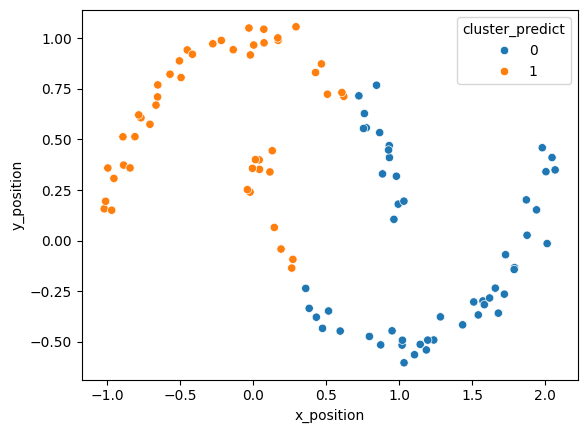

In [11]:
sns.scatterplot(X_test, x="x_position", y="y_position", hue="cluster_predict")

In [12]:
from sklearn.cluster import DBSCAN

In [15]:
dbscan = DBSCAN()
from sklearn.preprocessing import StandardScaler
df = df.drop("true_cluster", axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [16]:
dbscan.fit(X_scaled)

DBSCAN()

In [ ]:
X_scaled = pd.DataFrame(X_scaled, columns=df.columns)

<Axes: xlabel='x_position', ylabel='y_position'>

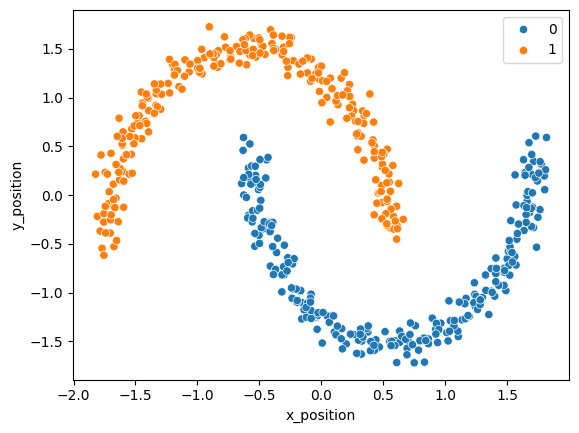

In [20]:
sns.scatterplot(X_scaled, x="x_position",y="y_position", hue=dbscan.labels_)

In [24]:
eps_values = [0.1,0.2,0.3,0.4,0.5,0.6]
min_sample_values = [4,5,6]
from sklearn.metrics import silhouette_score

In [32]:
results = []
for eps in eps_values:
    for min_samples in min_sample_values:
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_scaled)
        labels = db.labels_
        if len(set(labels)) <= 1:
            continue
        silhouette = silhouette_score(X_scaled, labels)
        results.append(
            {
                "eps": eps,
                "min_samples": min_samples,
                "silhouette_score": silhouette,
                "n_clusters": len(set(labels))
            }
        )
result_df = pd.DataFrame(results)
result_df.sort_values(by="silhouette_score", inplace=True, ascending=False)


In [33]:
result_df

,eps,min_samples,silhouette_score,n_clusters
4,0.2,5,0.389338,2
3,0.2,4,0.389338,2
14,0.5,6,0.389338,2
11,0.4,6,0.389338,2
5,0.2,6,0.389338,2
6,0.3,4,0.389338,2
8,0.3,6,0.389338,2
7,0.3,5,0.389338,2
9,0.4,4,0.389338,2
10,0.4,5,0.389338,2


In [34]:
from sklearn.cluster import HDBSCAN

In [35]:
hdbscan = HDBSCAN()

In [36]:
hdbscan.fit(X_scaled)

HDBSCAN()

<Axes: xlabel='x_position', ylabel='y_position'>

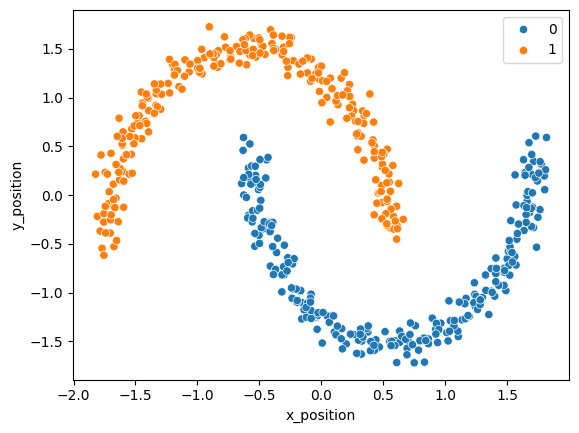

In [37]:
sns.scatterplot(X_scaled, x="x_position",y="y_position", hue=hdbscan.labels_)

In [38]:
silhouette_score(X_scaled, hdbscan.labels_)

np.float64(0.38933833783604915)